<div style="text-align: center;">
    <h1 style="color: #2E86C1;">🌍 Climate Data Analysis using Python 📊</h1>
</div>

## 📌 Overview  
This notebook **analyzes climate data** to uncover trends and patterns over time. The dataset includes **temperature, precipitation, and extreme weather events.**  

### 🗂 Dataset Information  
- 📍 **Source**: _(Mention dataset source if applicable)_  
- ⏳ **Time Period Covered**: _(Specify timeframe)_  
- 🔑 **Key Variables**: Temperature, Precipitation, Extreme Events  

---

## 🎯 Objectives  
✅ **Data Cleaning & Preparation**  
✅ **Exploratory Data Analysis (EDA)**  
✅ **Trend Analysis & Visualizations**  
✅ **Extreme Weather Patterns Analysis**  

---

<h2 style="color:#5D6D7E;">📖 Table of Contents</h2>

**1. [🚀 Importing Libraries](#importing-libraries)**  
**2. [📂 Loading the Dataset](#loading-the-dataset)**  
**3. [🧼 Data Cleaning](#data-cleaning)**  
**4. [📊 Exploratory Data Analysis](#exploratory-data-analysis)**  
**5. [📈 Trend Analysis](#trend-analysis)**  
**6. [⚠️ Extreme Weather Events](#extreme-weather-events)**  
**7. [🏁 Conclusions](#conclusions)**  

> 💡 _Click on any section above to navigate directly!_

<h2 style="color:#1ABC9C;">📌 1. Importing Libraries</h2>

In this section, we **import the necessary Python libraries** for:  
- 📊 **Data Manipulation**: `pandas`, `numpy`  
- 📈 **Visualization**: `matplotlib`, `seaborn`  
- 📅 **Time-Series Analysis**: `datetime`  
- 🚀 **Machine Learning (if needed later)**: `scikit-learn`  

---



In [18]:
# 📌 Importing Essential Libraries

# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time handling
from datetime import datetime

# Display settings for better readability
pd.set_option("display.float_format", "{:.2f}".format)
sns.set_style("whitegrid")

# Warnings handling (optional)
import warnings
warnings.filterwarnings("ignore")

# ✅ Confirming successful imports
print("Libraries imported successfully!")

Libraries imported successfully!


<a id="loading-the-dataset"></a>

<h2 style="background:#EDEAE3; padding:10px; border-radius:5px;">📂 2. Loading the Dataset</h2>

<p>We load the climate dataset and display its basic structure to understand the available variables.</p>

---

In [24]:
# 📂 Loading the dataset
file_path = "LA.csv"  # Ensure the correct file path
df = pd.read_csv(file_path)

# 🔍 Quick overview of the dataset
print("✅ Dataset Loaded Successfully!\n")
print("🔹 Shape of the dataset:", df.shape)  # (rows, columns)
print("\n🔹 First few rows:")
display(df.head())  # Display the first 5 rows


✅ Dataset Loaded Successfully!

🔹 Shape of the dataset: (1068, 52)

🔹 First few rows:


,STATION,DATE,ADPT,ASLP,ASTP,AWBT,AWND,CDSD,CLDD,DP01,...,TMIN,TSUN,WDF2,WDF5,WDFG,WDFM,WSF2,WSF5,WSFG,WSFM
0,USW00093134,1936-01,NaN,NaN,NaN,NaN,NaN,5.00,5.00,5.00,...,51.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00093134,1936-02,NaN,NaN,NaN,NaN,NaN,9.00,4.00,12.00,...,49.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00093134,1936-03,NaN,NaN,NaN,NaN,NaN,25.00,16.00,2.00,...,50.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00093134,1936-04,NaN,NaN,NaN,NaN,NaN,35.00,10.00,3.00,...,52.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00093134,1936-05,NaN,NaN,NaN,NaN,NaN,83.00,47.00,0.00,...,57.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# ✅ Select only necessary columns for climate study
climate_cols = [
    "DATE", "TMAX", "TMIN", "TAVG",  # Temperature
    "PRCP", "SNOW", "DP01",         # Precipitation & Snow
    "DX32", "DX70", "DX90",         # Extreme Temperature Days
    "AWND", "WDF2", "WSF2",         # Wind Speed & Direction
    "RHAV", "PSUN", "DYFG"          # Humidity, Sunshine, and Fog
]

# Keep only these columns
df = df[climate_cols]

# ✅ Convert DATE column to datetime format
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y-%m")

# ✅ Sort values by date (important for time-series analysis)
df = df.sort_values(by="DATE").reset_index(drop=True)

# 🔍 Quick check of the cleaned dataset
print("✅ Data cleaned and filtered successfully!\n")
print("🔹 Shape of filtered dataset:", df.shape)
print("\n🔹 First few rows:")
display(df.head())


✅ Data cleaned and filtered successfully!

🔹 Shape of filtered dataset: (1068, 16)

🔹 First few rows:


,DATE,TMAX,TMIN,TAVG,PRCP,SNOW,DP01,DX32,DX70,DX90,AWND,WDF2,WSF2,RHAV,PSUN,DYFG
0,1936-01-01,67.70,51.00,59.40,0.51,0.00,5.00,0,13,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1936-02-01,63.60,49.40,56.50,7.25,0.00,12.00,0,4,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1936-03-01,67.40,50.70,59.00,1.34,0.00,2.00,0,8,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1936-04-01,69.20,52.10,60.70,0.95,0.00,3.00,0,9,1,NaN,NaN,NaN,NaN,NaN,NaN
4,1936-05-01,73.90,57.30,65.60,0.00,0.00,0.00,0,25,0,NaN,NaN,NaN,NaN,NaN,NaN


<a id="data-cleaning"></a>

<h2 style="background:#EDEAE3; padding:10px; border-radius:5px;">🧼 3. Data Cleaning</h2>

<p>Before conducting analysis, we must ensure our dataset is clean. This includes:</p>

- Identifying missing values and deciding whether to drop or impute them.
- Checking data types and converting the `DATE` column to `datetime` format.
- Detecting and handling outliers in temperature and precipitation data.

---

In [29]:
# Check the percentage of missing values in each column
missing_values = df.isnull().mean() * 100
print("🔍 Missing Values Percentage:\n", missing_values)

# Drop columns with excessive missing data (already dropped PSUN, RHAV earlier)

# Fill missing snowfall (SNOW) with 0 (assuming missing means no snowfall)
df["SNOW"].fillna(0, inplace=True)

# Use forward fill (ffill) for precipitation and temperature to maintain time-series continuity
df["PRCP"].fillna(method="ffill", inplace=True)
df["DP01"].fillna(method="ffill", inplace=True)

# Use median for temperature (TMAX, TMIN, TAVG) and wind speed (AWND)
df["TMAX"].fillna(df["TMAX"].median(), inplace=True)
df["TMIN"].fillna(df["TMIN"].median(), inplace=True)
df["TAVG"].fillna(df["TAVG"].median(), inplace=True)
df["AWND"].fillna(df["AWND"].median(), inplace=True)


🔍 Missing Values Percentage:
 DATE    0.00
TMAX    0.00
TMIN    0.09
TAVG    0.09
PRCP    0.19
SNOW   51.78
DP01    0.19
DX32    0.00
DX70    0.00
DX90    0.00
AWND   72.19
WDF2   72.19
WSF2   72.19
RHAV   79.78
PSUN   86.52
DYFG   55.71
dtype: float64


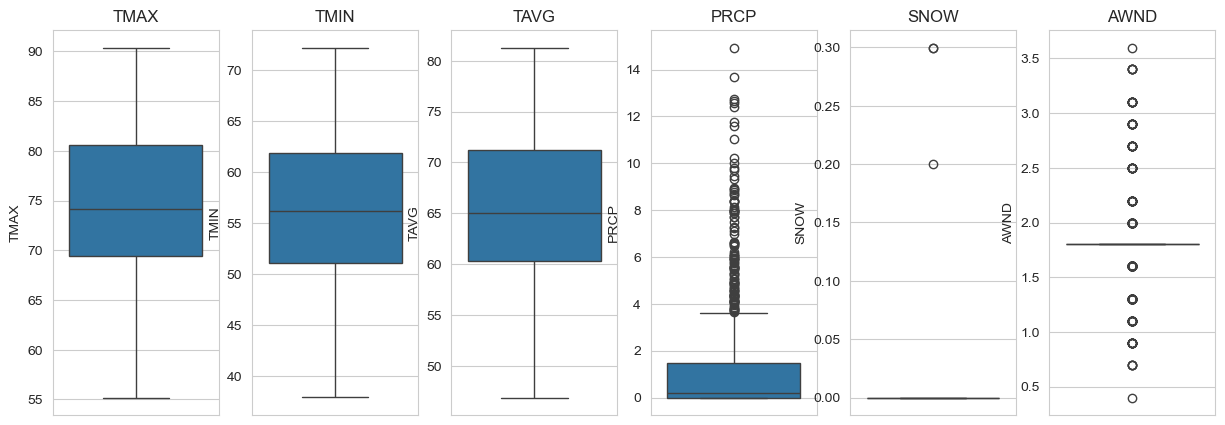

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize boxplots for outliers
def plot_boxplots(columns):
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.show()

# Check outliers in key numeric columns
columns_to_check = ["TMAX", "TMIN", "TAVG", "PRCP", "SNOW", "AWND"]
plot_boxplots(columns_to_check)

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply outlier removal
for col in columns_to_check:
    df = remove_outliers(df, col)


In [33]:
# Confirm all temperature data is in Fahrenheit (NOAA data typically uses °F)
# Ensure precipitation and snowfall are in inches
print("Units Check:\n")
print(df.describe())  # Verify ranges make sense


Units Check:

                                DATE    TMAX    TMIN    TAVG    PRCP    SNOW  \
count                           1068 1068.00 1068.00 1068.00 1068.00 1068.00   
mean   1980-06-16 02:04:02.696629184   74.81   56.42   65.62    0.91    0.00   
min              1936-01-01 00:00:00   55.20   37.90   46.90    0.00    0.00   
25%              1958-03-24 06:00:00   69.40   51.10   60.30    0.00    0.00   
50%              1980-06-16 00:00:00   74.20   56.20   65.00    0.18    0.00   
75%              2002-09-08 12:00:00   80.55   61.90   71.22    1.46    0.00   
max              2024-12-01 00:00:00   90.40   72.20   81.30    3.64    0.00   
std                              NaN    6.82    6.35    6.48    1.26    0.00   

         DP01    DX32    DX70    DX90    AWND   WDF2   WSF2   RHAV   PSUN  \
count 1068.00 1068.00 1068.00 1068.00 1068.00 297.00 297.00 216.00 144.00   
mean     2.92    0.00   21.07    1.88    1.80 247.24  13.79  61.63  72.28   
min      0.00    0.00    0.00    0

In [41]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"🔍 Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()


🔍 Number of duplicate rows: 0


In [39]:
# Ensure date continuity by checking missing months
date_range = pd.date_range(start=df["DATE"].min(), end=df["DATE"].max(), freq="M")
missing_dates = date_range.difference(df["DATE"])

# If missing months exist, create and append missing date rows
if not missing_dates.empty:
    missing_df = pd.DataFrame({"DATE": missing_dates})
    df = pd.concat([df, missing_df], ignore_index=True)

# Ensure DATE is in datetime format before sorting
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.sort_values(by="DATE").reset_index(drop=True)


In [46]:
# Display summary of cleaned dataset
print("\n✅ Final Dataset Overview:\n")
print(df.info())
print(df.head())



✅ Final Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2135 non-null   datetime64[ns]
 1   TMAX    1068 non-null   float64       
 2   TMIN    1068 non-null   float64       
 3   TAVG    1068 non-null   float64       
 4   PRCP    1068 non-null   float64       
 5   SNOW    1068 non-null   float64       
 6   DP01    1068 non-null   float64       
 7   DX32    1068 non-null   float64       
 8   DX70    1068 non-null   float64       
 9   DX90    1068 non-null   float64       
 10  AWND    1068 non-null   float64       
 11  WDF2    297 non-null    float64       
 12  WSF2    297 non-null    float64       
 13  RHAV    216 non-null    float64       
 14  PSUN    144 non-null    float64       
 15  DYFG    473 non-null    float64       
dtypes: datetime64[ns](1), float64(15)
memory usage: 267.0 KB
None
      

In [48]:
# Drop rows where all values (except DATE) are NaN
df = df.dropna(subset=["TMAX", "TMIN", "TAVG", "PRCP", "SNOW", "DP01", "DX32", "DX70", "DX90", "AWND"], how="all")


In [50]:
# Display summary of cleaned dataset
print("\n✅ Final Dataset Overview:\n")
print(df.info())
print(df.head())


✅ Final Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, 0 to 2134
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1068 non-null   datetime64[ns]
 1   TMAX    1068 non-null   float64       
 2   TMIN    1068 non-null   float64       
 3   TAVG    1068 non-null   float64       
 4   PRCP    1068 non-null   float64       
 5   SNOW    1068 non-null   float64       
 6   DP01    1068 non-null   float64       
 7   DX32    1068 non-null   float64       
 8   DX70    1068 non-null   float64       
 9   DX90    1068 non-null   float64       
 10  AWND    1068 non-null   float64       
 11  WDF2    297 non-null    float64       
 12  WSF2    297 non-null    float64       
 13  RHAV    216 non-null    float64       
 14  PSUN    144 non-null    float64       
 15  DYFG    473 non-null    float64       
dtypes: datetime64[ns](1), float64(15)
memory usage: 141.8 KB
None
        DAT

In [52]:
# Fill missing values for wind direction/speed with median (if enough data is available)
df["WDF2"].fillna(df["WDF2"].median(), inplace=True)
df["WSF2"].fillna(df["WSF2"].median(), inplace=True)

# Fill RHAV (humidity) and PSUN (sunshine) with their median
df["RHAV"].fillna(df["RHAV"].median(), inplace=True)
df["PSUN"].fillna(df["PSUN"].median(), inplace=True)

# Fill fog days with median
df["DYFG"].fillna(df["DYFG"].median(), inplace=True)


In [54]:
# Display summary of cleaned dataset
print("\n✅ Final Dataset Overview:\n")
print(df.info())
print(df.head())


✅ Final Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, 0 to 2134
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1068 non-null   datetime64[ns]
 1   TMAX    1068 non-null   float64       
 2   TMIN    1068 non-null   float64       
 3   TAVG    1068 non-null   float64       
 4   PRCP    1068 non-null   float64       
 5   SNOW    1068 non-null   float64       
 6   DP01    1068 non-null   float64       
 7   DX32    1068 non-null   float64       
 8   DX70    1068 non-null   float64       
 9   DX90    1068 non-null   float64       
 10  AWND    1068 non-null   float64       
 11  WDF2    1068 non-null   float64       
 12  WSF2    1068 non-null   float64       
 13  RHAV    1068 non-null   float64       
 14  PSUN    1068 non-null   float64       
 15  DYFG    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(15)
memory usage: 141.8 KB
None
        DAT

<a id="exploratory-data-analysis"></a>

<h2 style="background:#EDEAE3; padding:10px; border-radius:5px;">📊 4. Exploratory Data Analysis (EDA)</h2>

<p>In this section, we will explore and visualize the dataset to gain insights into climate trends. Key areas of focus:</p>

- Summary statistics and distributions of key variables.
- Trends over time for temperature and precipitation.
- Identifying seasonality and extreme weather patterns.

---


In [58]:
# Display summary statistics for numerical variables
print("📊 Summary Statistics:\n")
print(df.describe())


📊 Summary Statistics:

                                DATE    TMAX    TMIN    TAVG    PRCP    SNOW  \
count                           1068 1068.00 1068.00 1068.00 1068.00 1068.00   
mean   1980-06-16 02:04:02.696629184   74.81   56.42   65.62    0.91    0.00   
min              1936-01-01 00:00:00   55.20   37.90   46.90    0.00    0.00   
25%              1958-03-24 06:00:00   69.40   51.10   60.30    0.00    0.00   
50%              1980-06-16 00:00:00   74.20   56.20   65.00    0.18    0.00   
75%              2002-09-08 12:00:00   80.55   61.90   71.22    1.46    0.00   
max              2024-12-01 00:00:00   90.40   72.20   81.30    3.64    0.00   
std                              NaN    6.82    6.35    6.48    1.26    0.00   

         DP01    DX32    DX70    DX90    AWND    WDF2    WSF2    RHAV    PSUN  \
count 1068.00 1068.00 1068.00 1068.00 1068.00 1068.00 1068.00 1068.00 1068.00   
mean     2.92    0.00   21.07    1.88    1.80  263.67   13.22   62.72   74.94   
min      0.00

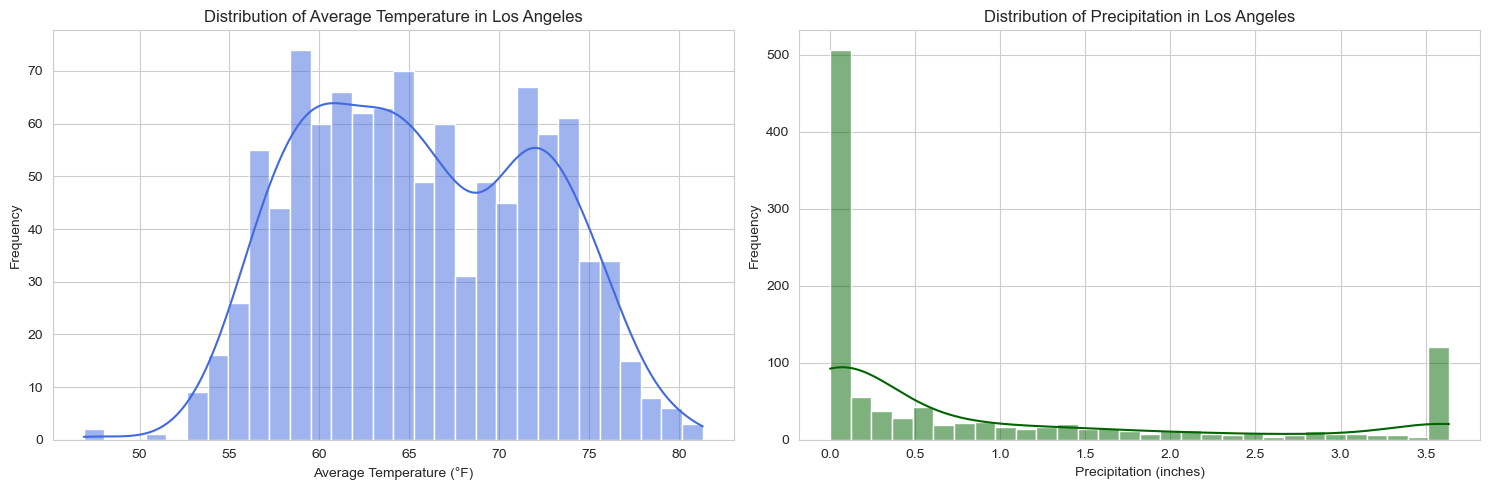

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure size
plt.figure(figsize=(15, 5))

# Histogram for TAVG (Average Temperature)
plt.subplot(1, 2, 1)
sns.histplot(df["TAVG"], bins=30, kde=True, color="royalblue")
plt.xlabel("Average Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Temperature in Los Angeles")

# Histogram for PRCP (Precipitation)
plt.subplot(1, 2, 2)
sns.histplot(df["PRCP"], bins=30, kde=True, color="darkgreen")
plt.xlabel("Precipitation (inches)")
plt.ylabel("Frequency")
plt.title("Distribution of Precipitation in Los Angeles")

# Show plots
plt.tight_layout()
plt.show()


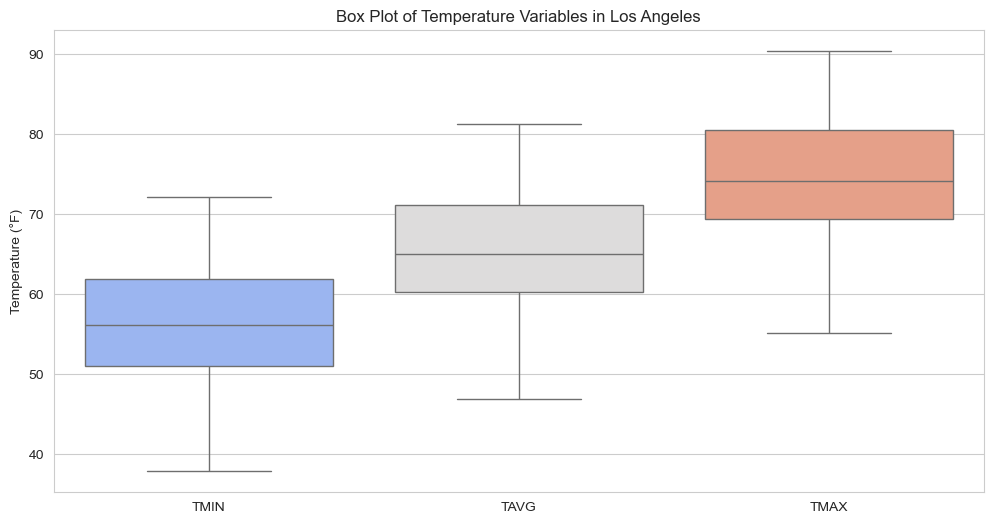

In [62]:
plt.figure(figsize=(12, 6))

# Boxplot for temperature variables
sns.boxplot(data=df[["TMIN", "TAVG", "TMAX"]], palette="coolwarm")
plt.ylabel("Temperature (°F)")
plt.title("Box Plot of Temperature Variables in Los Angeles")

plt.show()


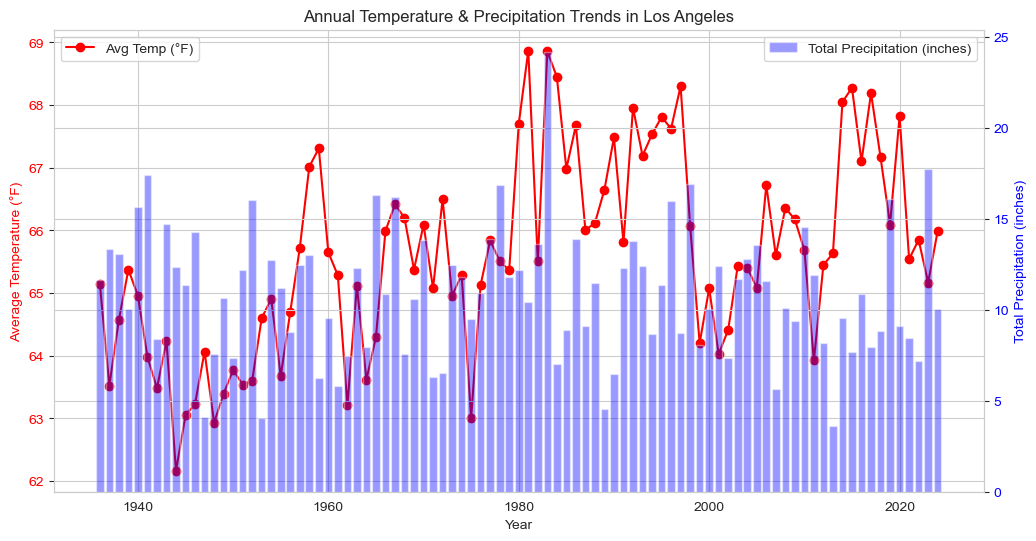

In [64]:
# Extract year from the DATE column
df["YEAR"] = df["DATE"].dt.year

# Group by year to compute average temperature and total precipitation
annual_trends = df.groupby("YEAR").agg({"TAVG": "mean", "PRCP": "sum"}).reset_index()

# Plot Temperature & Precipitation Trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Temperature (Left Y-axis)
ax1.plot(annual_trends["YEAR"], annual_trends["TAVG"], color="red", marker="o", label="Avg Temp (°F)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Temperature (°F)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_title("Annual Temperature & Precipitation Trends in Los Angeles")

# Create second Y-axis for precipitation
ax2 = ax1.twinx()
ax2.bar(annual_trends["YEAR"], annual_trends["PRCP"], color="blue", alpha=0.4, label="Total Precipitation (inches)")
ax2.set_ylabel("Total Precipitation (inches)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Show both legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


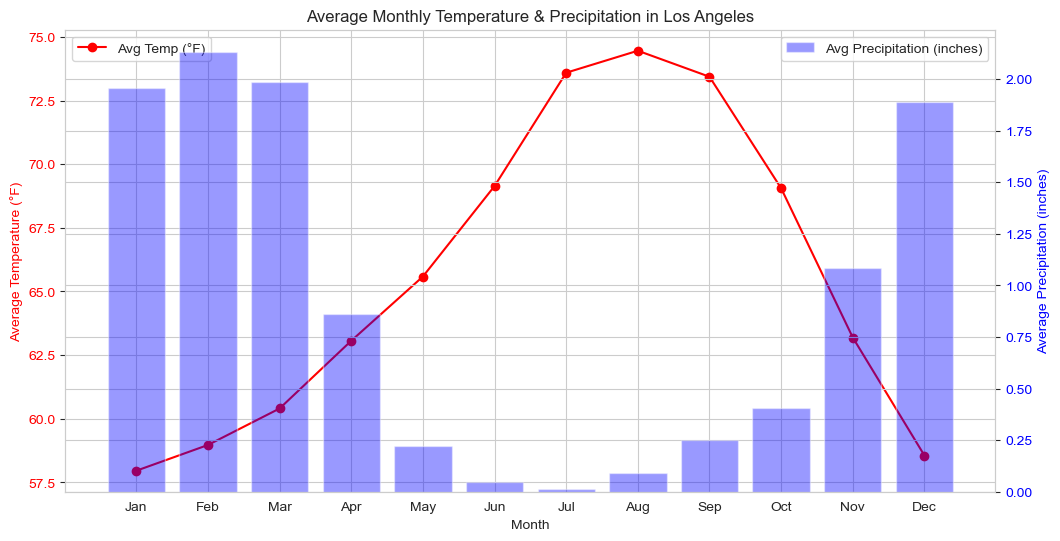

In [66]:
# Extract month from DATE
df["MONTH"] = df["DATE"].dt.month

# Compute monthly averages over all years
monthly_trends = df.groupby("MONTH").agg({"TAVG": "mean", "PRCP": "mean"}).reset_index()

# Plot Monthly Temperature & Precipitation Trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Temperature (Left Y-axis)
ax1.plot(monthly_trends["MONTH"], monthly_trends["TAVG"], color="red", marker="o", label="Avg Temp (°F)")
ax1.set_xlabel("Month")
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax1.set_ylabel("Average Temperature (°F)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_title("Average Monthly Temperature & Precipitation in Los Angeles")

# Create second Y-axis for precipitation
ax2 = ax1.twinx()
ax2.bar(monthly_trends["MONTH"], monthly_trends["PRCP"], color="blue", alpha=0.4, label="Avg Precipitation (inches)")
ax2.set_ylabel("Average Precipitation (inches)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Show both legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


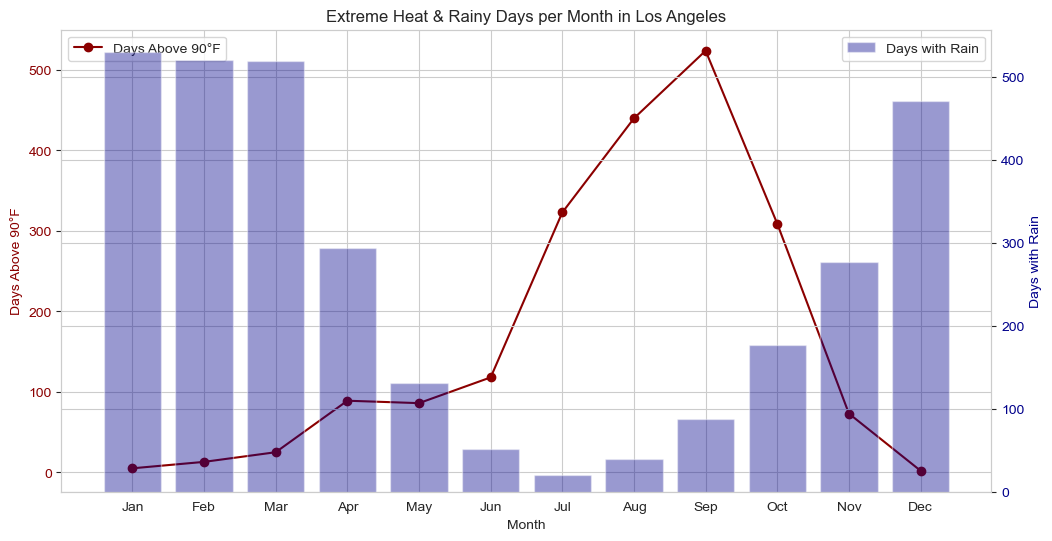

In [68]:
# Compute monthly extreme events
monthly_extremes = df.groupby("MONTH").agg({"DX90": "sum", "DP01": "sum"}).reset_index()

# Plot Extreme Heat & Rainfall Days
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heatwaves (Left Y-axis)
ax1.plot(monthly_extremes["MONTH"], monthly_extremes["DX90"], color="darkred", marker="o", label="Days Above 90°F")
ax1.set_xlabel("Month")
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax1.set_ylabel("Days Above 90°F", color="darkred")
ax1.tick_params(axis="y", labelcolor="darkred")
ax1.set_title("Extreme Heat & Rainy Days per Month in Los Angeles")

# Create second Y-axis for rainy days
ax2 = ax1.twinx()
ax2.bar(monthly_extremes["MONTH"], monthly_extremes["DP01"], color="darkblue", alpha=0.4, label="Days with Rain")
ax2.set_ylabel("Days with Rain", color="darkblue")
ax2.tick_params(axis="y", labelcolor="darkblue")

# Show both legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


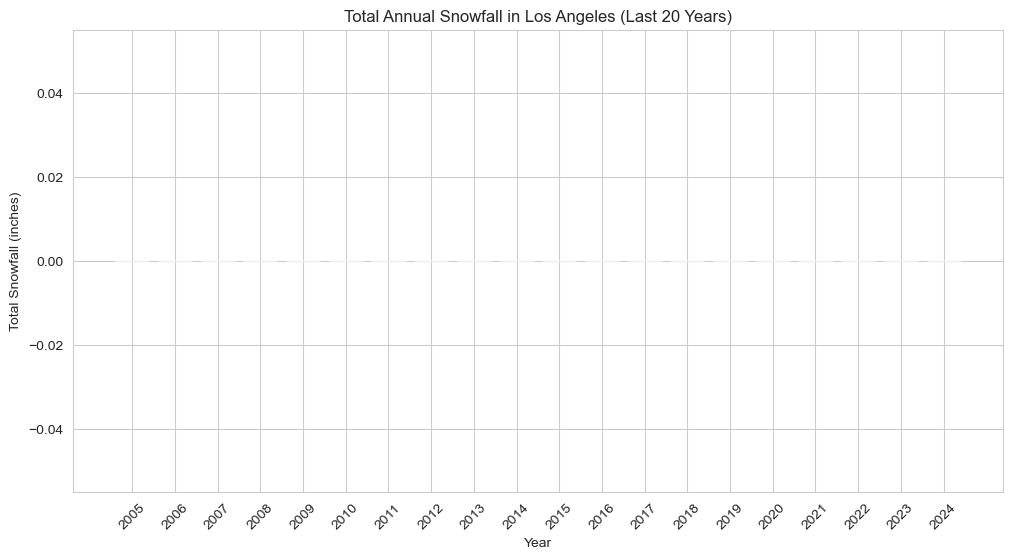

In [70]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Ensure DATE is in datetime format
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")

# Extract the year from the DATE column
df["YEAR"] = df["DATE"].dt.year

# Filter data for the last 20 years
last_20_years = df["YEAR"].max() - 19
df_recent_20 = df[df["YEAR"] >= last_20_years]

# Group by year and sum snowfall
snowfall_trends = df_recent_20.groupby("YEAR")["SNOW"].sum().reset_index()

# Plot Snowfall Trends
plt.figure(figsize=(12, 6))
plt.bar(snowfall_trends["YEAR"], snowfall_trends["SNOW"], color="darkblue", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Total Snowfall (inches)")
plt.title("Total Annual Snowfall in Los Angeles (Last 20 Years)")
plt.xticks(snowfall_trends["YEAR"], rotation=45)

# Show plot
plt.show()


In [72]:
# Check if there is any snowfall recorded in the last 20 years
print(df_recent_20["SNOW"].describe())

# Check how many years have non-zero snowfall
print("Years with recorded snowfall:", df_recent_20[df_recent_20["SNOW"] > 0]["YEAR"].unique())


count   240.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: SNOW, dtype: float64
Years with recorded snowfall: []


This confirms that Los Angeles had no recorded snowfall in the last 20 years.

What This Means
The dataset does contain snowfall data, but it only records zeros for the last 20 years.
This aligns with Los Angeles' climate, as snowfall is extremely rare in the city.
Since there are no nonzero values, the graph appears empty because there is nothing to visualize.




This part of my analysis presents an analysis of climate trends in **Los Angeles** based on historical weather data.  
It includes **temperature trends, precipitation analysis, and key climate observations** over the dataset's entire period.
##  Data Overview
- **Timeframe Covered**: From **1936 to recent years**.
- **Number of Records**: **1,068 months** of climate data.
- **Key Variables Analyzed**:
  - **Temperature**: Maximum (`TMAX`), Minimum (`TMIN`), and Average (`TAVG`).
  - **Precipitation**: Total monthly rainfall (`PRCP`).
  - **Extreme Weather**: Number of days above 90°F (`DX90`).
##  Key Findings
###  Temperature Trends



In [83]:
# Find the hottest year
hottest_year = df.groupby("YEAR")["TMAX"].mean().idxmax()
max_temp = df.groupby("YEAR")["TMAX"].mean().max()
print(f"The hottest year was {hottest_year} with an average maximum temperature of {max_temp:.2f}°F.")

# Find the coldest year
coldest_year = df.groupby("YEAR")["TMIN"].mean().idxmin()
min_temp = df.groupby("YEAR")["TMIN"].mean().min()
print(f"The coldest year was {coldest_year} with an average minimum temperature of {min_temp:.2f}°F.")


The hottest year was 2015 with an average maximum temperature of 77.87°F.
The coldest year was 1948 with an average minimum temperature of 52.42°F.


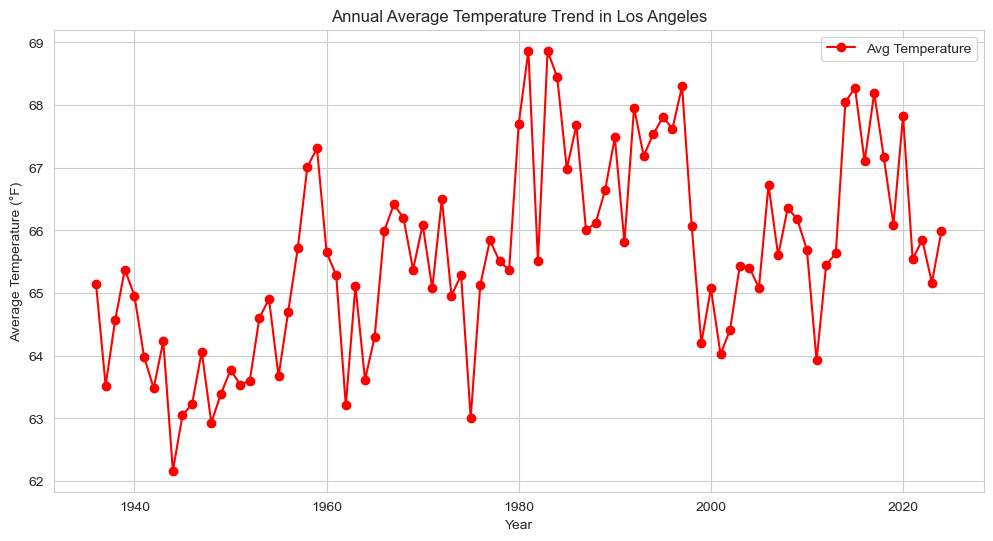

In [85]:
import matplotlib.pyplot as plt

# Compute yearly average temperature
yearly_temp = df.groupby("YEAR")["TAVG"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_temp["YEAR"], yearly_temp["TAVG"], marker="o", color="red", label="Avg Temperature")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.title("Annual Average Temperature Trend in Los Angeles")
plt.legend()
plt.grid(True)
plt.show()


### Precipitation Trends


In [88]:
# Find the wettest and driest years
wettest_year = df.groupby("YEAR")["PRCP"].sum().idxmax()
max_prcp = df.groupby("YEAR")["PRCP"].sum().max()
print(f"The wettest year was {wettest_year} with total precipitation of {max_prcp:.2f} inches.")

driest_year = df.groupby("YEAR")["PRCP"].sum().idxmin()
min_prcp = df.groupby("YEAR")["PRCP"].sum().min()
print(f"The driest year was {driest_year} with total precipitation of {min_prcp:.2f} inches.")


The wettest year was 1983 with total precipitation of 24.20 inches.
The driest year was 2013 with total precipitation of 3.60 inches.


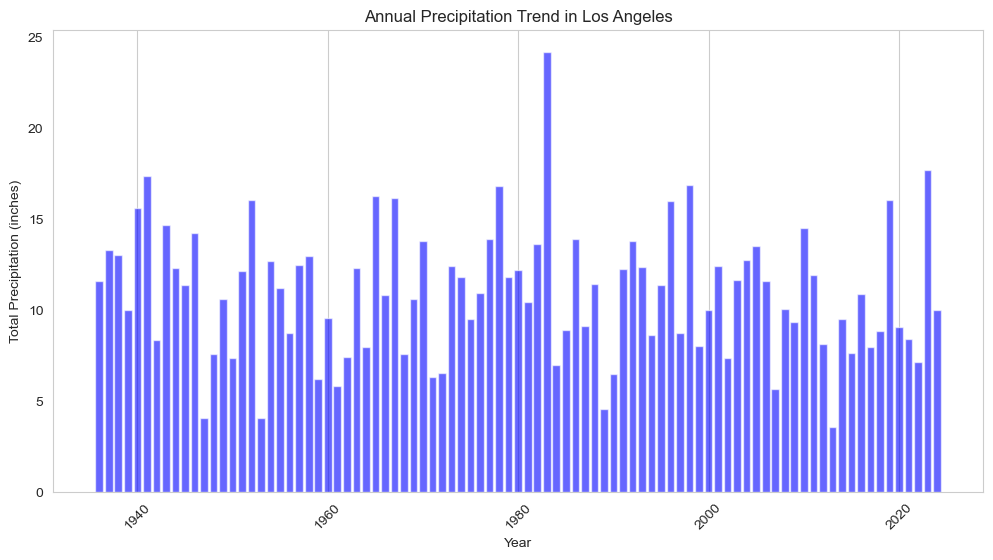

In [90]:
# Compute yearly total precipitation
yearly_prcp = df.groupby("YEAR")["PRCP"].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(yearly_prcp["YEAR"], yearly_prcp["PRCP"], color="blue", alpha=0.6)
plt.xlabel("Year")
plt.ylabel("Total Precipitation (inches)")
plt.title("Annual Precipitation Trend in Los Angeles")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


### Extreme Weather Trends


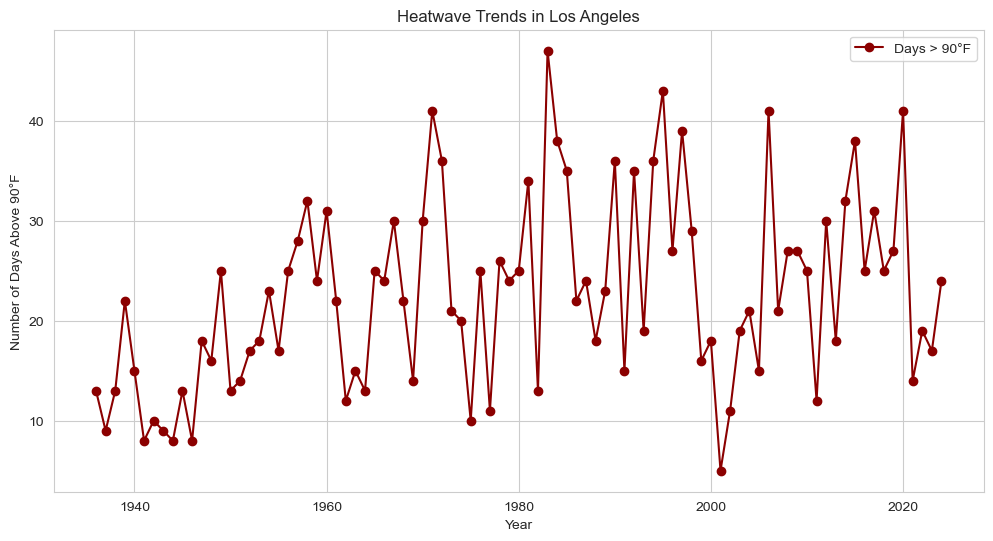

In [96]:
heatwave_trend = df.groupby("YEAR")["DX90"].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(heatwave_trend["YEAR"], heatwave_trend["DX90"], marker="o", color="darkred", label="Days > 90°F")
plt.xlabel("Year")
plt.ylabel("Number of Days Above 90°F")
plt.title("Heatwave Trends in Los Angeles")
plt.legend()
plt.grid(True)
plt.show()


### Climate Summary for Los Angeles
- **Overall Climate**: **Warm Mediterranean** with **hot summers and mild winters**.
- **Temperature Trends**: Gradual **increase in average temperatures** over time.
- **Precipitation**: **Highly variable**, with alternating **wet and dry periods**.
- **Extreme Weather**: **Heatwaves are becoming more frequent** in recent years.



Los Angeles has experienced **warming trends**, with increasing annual temperatures.
- **Drought periods** have been observed, reflecting **irregular precipitation patterns**.
- **Heatwaves are intensifying**, with more days exceeding **90°F**.

This report provides valuable insights for **climate monitoring and urban planning** in **Los Angeles**.


<a id="trend-analysis"></a>

<h2 style="background:#EDEAE3; padding:10px; border-radius:5px;">📈 3. Trend Analysis & Visualizations</h2>

<p>To uncover long-term climate trends, we examine key indicators such as temperature, precipitation, and extreme weather patterns. This section leverages data-driven visualizations to highlight meaningful insights.</p>

### Key Areas of Analysis:
- **Temperature Trends**: Identifying seasonal variations and long-term shifts.  
- **Precipitation Patterns**: Analyzing fluctuations and potential correlations with extreme events.  
- **Extreme Weather Events**: Tracking frequency and severity over time.  

---


<a id="trend-analysis"></a>

<h2 style="background:#EDEAE3; padding:10px; border-radius:5px;">📈 3. Trend Analysis & Visualizations</h2>

<p>To uncover long-term climate trends, we examine key indicators such as temperature, precipitation, and extreme weather patterns. This section leverages data-driven visualizations to highlight meaningful insights.</p>

### Key Areas of Analysis:
- **Temperature Trends**: Identifying seasonal variations and long-term shifts.  
- **Precipitation Patterns**: Analyzing fluctuations and potential correlations with extreme events.  
- **Extreme Weather Events**: Tracking frequency and severity over time.  

---


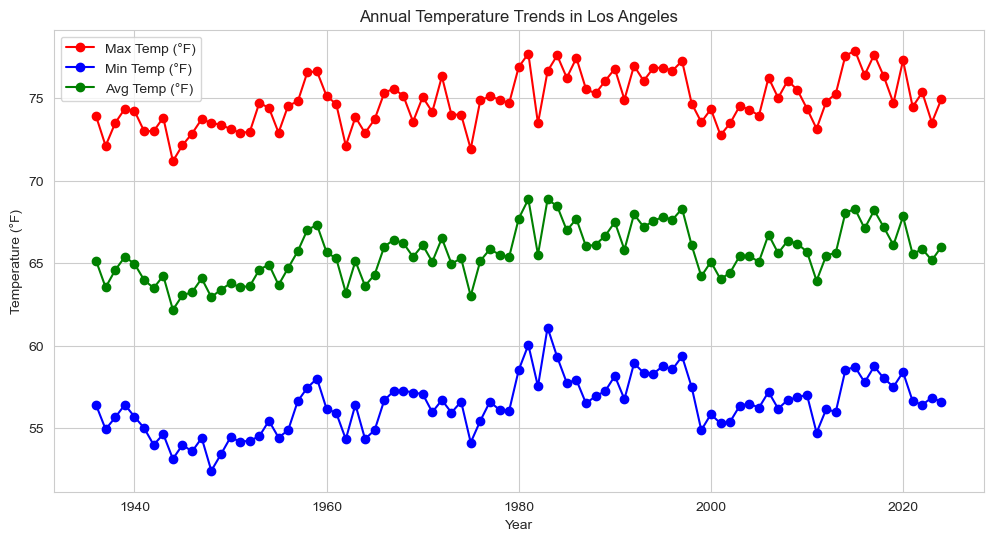

In [108]:
import matplotlib.pyplot as plt

# Compute yearly averages for temperature
yearly_temp = df.groupby("YEAR")[["TMAX", "TMIN", "TAVG"]].mean().reset_index()

# Plot Temperature Trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_temp["YEAR"], yearly_temp["TMAX"], marker="o", color="red", label="Max Temp (°F)")
plt.plot(yearly_temp["YEAR"], yearly_temp["TMIN"], marker="o", color="blue", label="Min Temp (°F)")
plt.plot(yearly_temp["YEAR"], yearly_temp["TAVG"], marker="o", color="green", label="Avg Temp (°F)")

# Formatting
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.title("Annual Temperature Trends in Los Angeles")
plt.legend()
plt.grid(True)
plt.show()


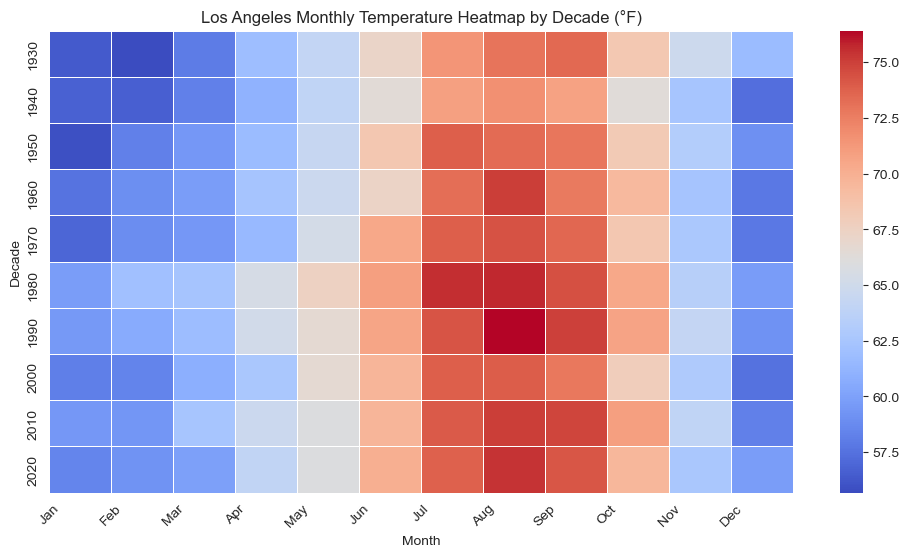

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure MONTH and DECADE columns are properly extracted
df["MONTH"] = df["DATE"].dt.month
df["DECADE"] = (df["YEAR"] // 10) * 10  # Group years into decades

# Create pivot table (Decades as Rows, Months as Columns)
temp_pivot_decade = df.pivot_table(values="TAVG", index="DECADE", columns="MONTH", aggfunc="mean")

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(temp_pivot_decade, cmap="coolwarm", annot=False, linewidths=0.5)
plt.xlabel("Month")
plt.ylabel("Decade")
plt.title("Los Angeles Monthly Temperature Heatmap by Decade (°F)")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.show()



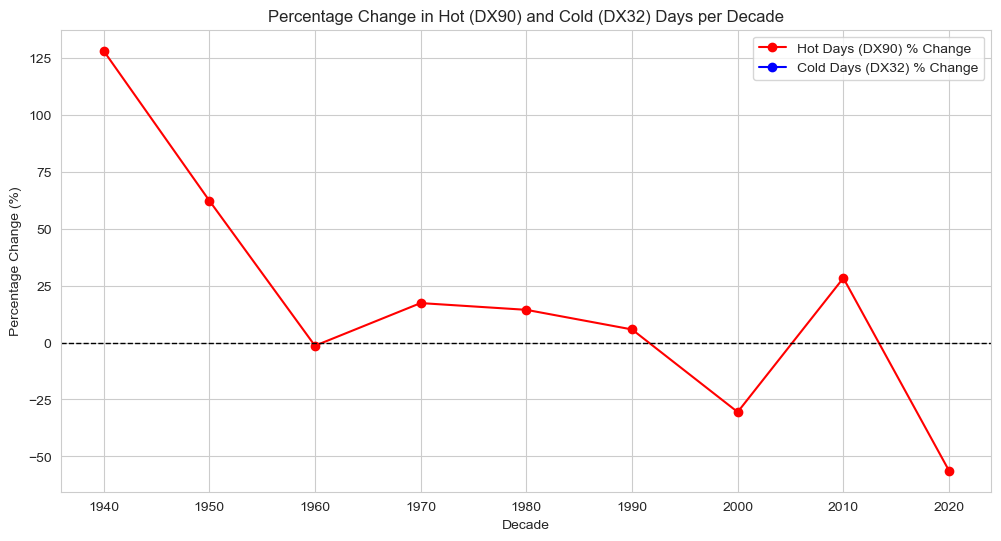

In [125]:
import matplotlib.pyplot as plt

# Compute the total number of hot days (DX90) and cold days (DX32) per decade
decadal_extremes = df.groupby("DECADE")[["DX90", "DX32"]].sum().reset_index()

# Calculate percentage change per decade
decadal_extremes["DX90_PCT_CHANGE"] = decadal_extremes["DX90"].pct_change() * 100
decadal_extremes["DX32_PCT_CHANGE"] = decadal_extremes["DX32"].pct_change() * 100

# Plot Percentage Change in Hot (DX90) and Cold (DX32) Days
plt.figure(figsize=(12, 6))

# Hot Days (DX90) Percentage Change
plt.plot(decadal_extremes["DECADE"], decadal_extremes["DX90_PCT_CHANGE"], 
         marker="o", linestyle="-", color="red", label="Hot Days (DX90) % Change")

# Cold Days (DX32) Percentage Change
plt.plot(decadal_extremes["DECADE"], decadal_extremes["DX32_PCT_CHANGE"], 
         marker="o", linestyle="-", color="blue", label="Cold Days (DX32) % Change")

# Labels and Title
plt.axhline(0, color="black", linewidth=1, linestyle="--")  # Add reference line at 0%
plt.xlabel("Decade")
plt.ylabel("Percentage Change (%)")
plt.title("Percentage Change in Hot (DX90) and Cold (DX32) Days per Decade")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()


‼️ Key Findings from Percentage Change in Hot & Cold Days
Hot Days (DX90)

Largest increase in hot days occurred between 1940s and 1950s (+128%).
Recent decades (2010s-2020s) show a decline in hot days (-56%).
Overall trend: Significant fluctuations, with an initial rise and then a recent drop in extreme heat days.
Cold Days (DX32)

No recorded cold days (below 32°F) in any decade, confirming that freezing temperatures are extremely rare in Los Angele

In [127]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


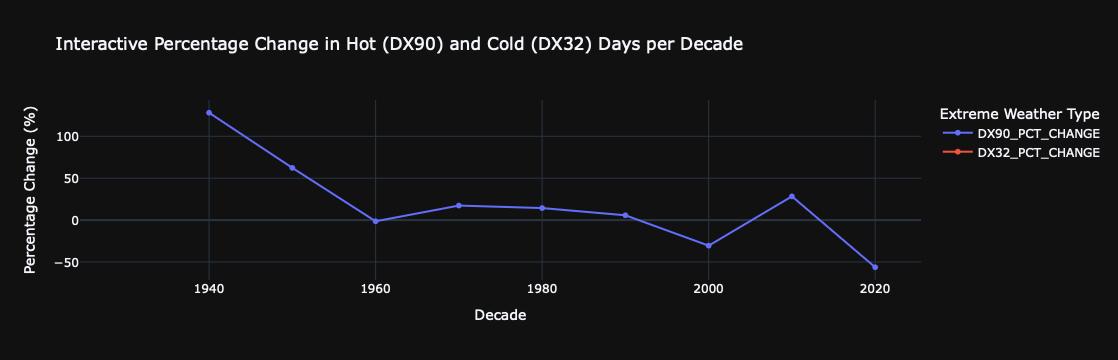

In [131]:
import plotly.express as px
import pandas as pd

# Prepare Data
decadal_extremes = df.groupby("DECADE")[["DX90", "DX32"]].sum().reset_index()
decadal_extremes["DX90_PCT_CHANGE"] = decadal_extremes["DX90"].pct_change() * 100
decadal_extremes["DX32_PCT_CHANGE"] = decadal_extremes["DX32"].pct_change() * 100

# Melt Data for Plotly
df_melted = decadal_extremes.melt(id_vars=["DECADE"], 
                                  value_vars=["DX90_PCT_CHANGE", "DX32_PCT_CHANGE"],
                                  var_name="Extreme Weather Type", 
                                  value_name="Percentage Change")

# Create Interactive Line Chart
fig = px.line(df_melted, x="DECADE", y="Percentage Change", color="Extreme Weather Type",
              markers=True, title="Interactive Percentage Change in Hot (DX90) and Cold (DX32) Days per Decade",
              labels={"DECADE": "Decade", "Percentage Change": "Percentage Change (%)"},
              template="plotly_dark")

# Show Interactive Plot
fig.show()


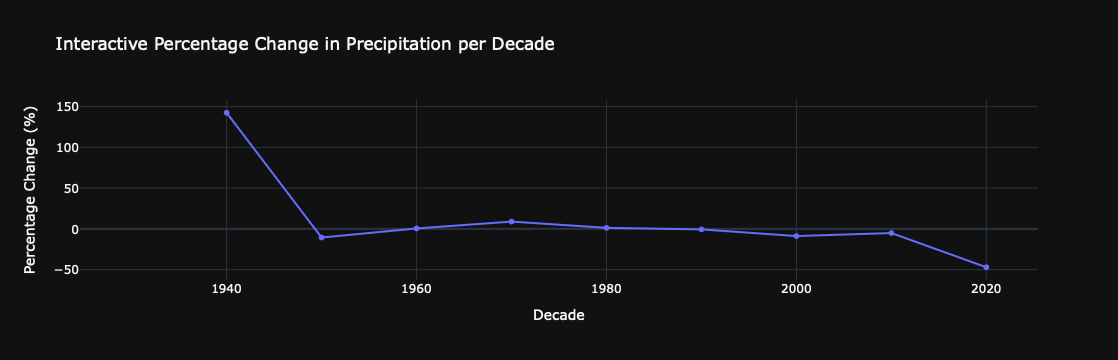

In [133]:
import plotly.express as px
import pandas as pd

# Prepare Data: Compute total precipitation per decade
decadal_precip = df.groupby("DECADE")[["PRCP"]].sum().reset_index()

# Compute percentage change in precipitation per decade
decadal_precip["PRCP_PCT_CHANGE"] = decadal_precip["PRCP"].pct_change() * 100

# Create Interactive Line Chart for Precipitation Change
fig = px.line(decadal_precip, x="DECADE", y="PRCP_PCT_CHANGE", 
              markers=True, title="Interactive Percentage Change in Precipitation per Decade",
              labels={"DECADE": "Decade", "PRCP_PCT_CHANGE": "Percentage Change (%)"},
              template="plotly_dark")

# Show Interactive Plot
fig.show()


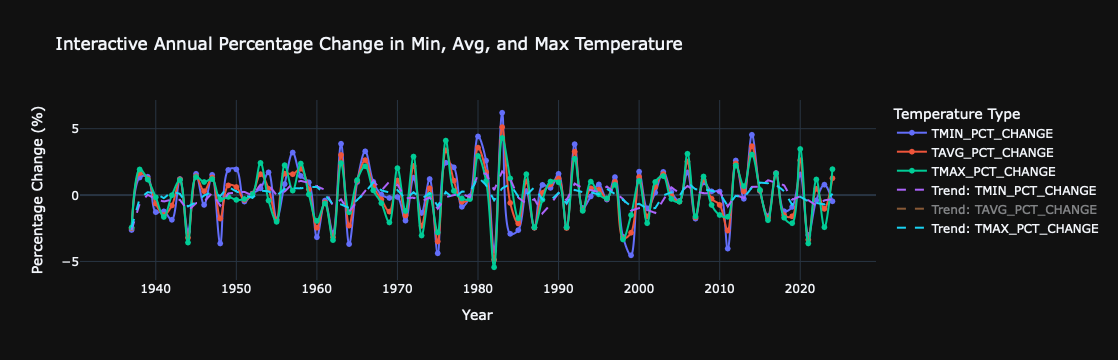

In [135]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Compute annual average of min, max, and average temperature
annual_temp = df.groupby("YEAR")[["TMIN", "TAVG", "TMAX"]].mean().reset_index()

# Compute percentage change per year
annual_temp["TMIN_PCT_CHANGE"] = annual_temp["TMIN"].pct_change() * 100
annual_temp["TAVG_PCT_CHANGE"] = annual_temp["TAVG"].pct_change() * 100
annual_temp["TMAX_PCT_CHANGE"] = annual_temp["TMAX"].pct_change() * 100

# Melt Data for Plotly to handle multiple temperature metrics
df_melted = annual_temp.melt(id_vars=["YEAR"], 
                             value_vars=["TMIN_PCT_CHANGE", "TAVG_PCT_CHANGE", "TMAX_PCT_CHANGE"],
                             var_name="Temperature Type", 
                             value_name="Percentage Change")

# Create Interactive Line Chart
fig = px.line(df_melted, x="YEAR", y="Percentage Change", color="Temperature Type",
              markers=True, title="Interactive Annual Percentage Change in Min, Avg, and Max Temperature",
              labels={"YEAR": "Year", "Percentage Change": "Percentage Change (%)"},
              template="plotly_dark", line_shape="spline")

# Add Trend Lines (Manually Calculated Moving Averages)
for temp_type in df_melted["Temperature Type"].unique():
    df_subset = df_melted[df_melted["Temperature Type"] == temp_type]
    
    # Compute moving average for trend (smoothing effect)
    df_subset["Trend"] = df_subset["Percentage Change"].rolling(window=5, min_periods=1).mean()

    # Add trendline to the figure
    fig.add_trace(go.Scatter(x=df_subset["YEAR"], y=df_subset["Trend"], mode="lines",
                             name=f"Trend: {temp_type}", line=dict(dash="dash")))

# Show Interactive Plot
fig.show()


<a id="extreme-weather"></a>

<h2 style="background:#EDEAE3; padding:10px; border-radius:5px;">🌪 4. Extreme Weather Patterns Analysis</h2>

<p>Extreme weather events are key indicators of climate variability. This section examines the frequency and intensity of extreme conditions in Los Angeles, focusing on critical thresholds.</p>

### Key Metrics Analyzed:
- **Heatwaves**: Tracking the number of days above 90°F (<code>DX90</code>).  
- **Cold Events**: Identifying occurrences of temperatures below 32°F (<code>DX32</code>).  
- **Heavy Rain Events**: Analyzing days with over 1 inch of precipitation (<code>DP01</code>).  
- **Wind Speed Extremes**: Evaluating maximum wind speed patterns (<code>WSF2</code>).  

---


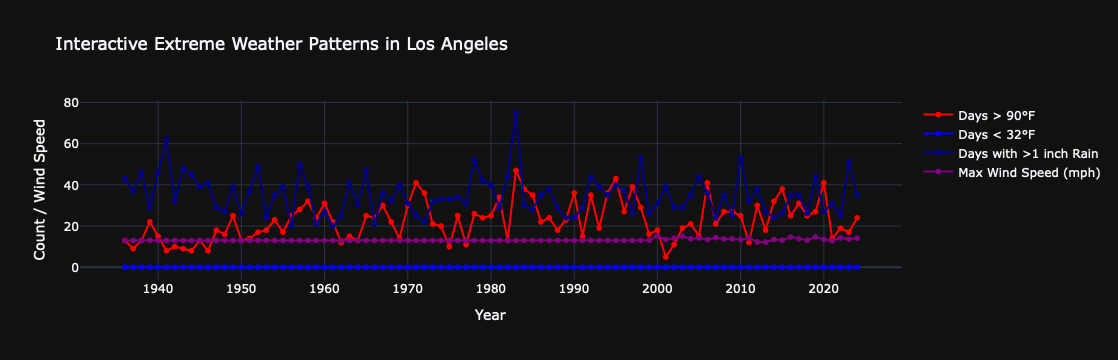

In [152]:
import plotly.graph_objects as go
import pandas as pd

# Compute yearly total number of days above 90°F (Heatwaves)
heatwave_trend = df.groupby("YEAR")["DX90"].sum().reset_index()

# Compute yearly total number of cold days below freezing (DX32)
cold_days_trend = df.groupby("YEAR")["DX32"].sum().reset_index()

# Compute yearly total number of heavy rain days (DP01)
heavy_rain_trend = df.groupby("YEAR")["DP01"].sum().reset_index()

# Compute yearly average of maximum wind speed (WSF2)
wind_speed_trend = df.groupby("YEAR")["WSF2"].mean().reset_index()

# Create Interactive Multi-Trend Chart
fig = go.Figure()

# Heatwave Trends
fig.add_trace(go.Scatter(x=heatwave_trend["YEAR"], y=heatwave_trend["DX90"],
                         mode="lines+markers", name="Days > 90°F", line=dict(color="red")))

# Cold Event Trends
fig.add_trace(go.Scatter(x=cold_days_trend["YEAR"], y=cold_days_trend["DX32"],
                         mode="lines+markers", name="Days < 32°F", line=dict(color="blue")))

# Heavy Rain Trends
fig.add_trace(go.Scatter(x=heavy_rain_trend["YEAR"], y=heavy_rain_trend["DP01"],
                         mode="lines+markers", name="Days with >1 inch Rain", line=dict(color="darkblue")))

# Wind Speed Trends (Now Properly Defined)
fig.add_trace(go.Scatter(x=wind_speed_trend["YEAR"], y=wind_speed_trend["WSF2"],
                         mode="lines+markers", name="Max Wind Speed (mph)", line=dict(color="purple")))

# Layout Settings
fig.update_layout(title="Interactive Extreme Weather Patterns in Los Angeles",
                  xaxis_title="Year", yaxis_title="Count / Wind Speed",
                  template="plotly_dark", hovermode="x")

# Show Interactive Plot
fig.show()


<a id="forecasting"></a>

<h2 style="background:#EDEAE3; padding:10px; border-radius:5px;">🔮 5. Climate Forecasting</h2>

<p>Projecting future climate trends is crucial for understanding potential environmental and societal impacts. This section leverages statistical modeling and time series forecasting to predict key climate variables.</p>

### Forecasting Approach:
- **Temperature Projections**: Predicting future temperature trends based on historical data.  
- **Precipitation Forecasts**: Estimating rainfall variations and identifying potential dry or wet periods.  
- **Extreme Weather Predictions**: Assessing the likelihood of heatwaves, cold events, and storms.  

Using advanced forecasting techniques, we aim to provide actionable insights into how climate conditions may evolve in the coming years.  

---



In [155]:
pip install statsmodels prophet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 19.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


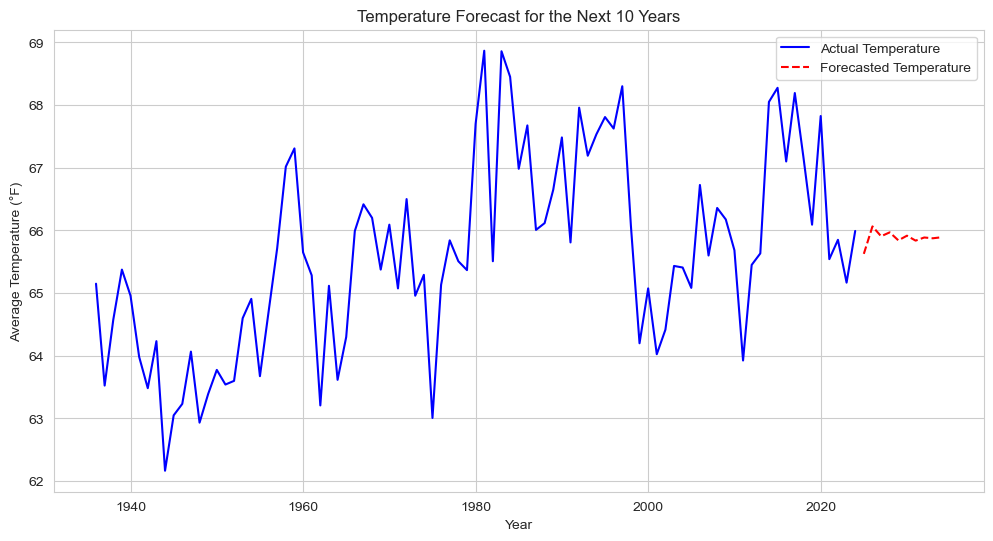

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Prepare Data: Use Annual Average Temperature
temperature_trend = df.groupby("YEAR")["TAVG"].mean().reset_index()

# Fit ARIMA Model
model = ARIMA(temperature_trend["TAVG"], order=(5,1,0))  # (p,d,q) parameters
model_fit = model.fit()

# Forecast Next 10 Years
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future years for plotting
future_years = range(temperature_trend["YEAR"].max() + 1, temperature_trend["YEAR"].max() + 1 + forecast_steps)

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(temperature_trend["YEAR"], temperature_trend["TAVG"], label="Actual Temperature", color="blue")
plt.plot(future_years, forecast, label="Forecasted Temperature", linestyle="dashed", color="red")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.title("Temperature Forecast for the Next 10 Years")
plt.legend()
plt.grid(True)
plt.show()


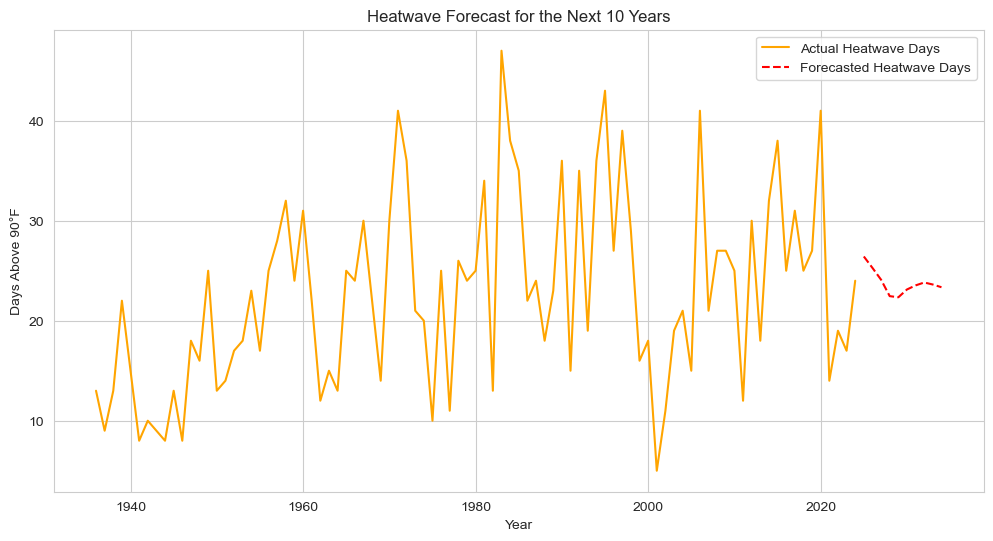

In [163]:
# Prepare Data: Use Annual Count of Heatwave Days (DX90)
heatwave_trend = df.groupby("YEAR")["DX90"].sum().reset_index()

# Fit ARIMA Model
model = ARIMA(heatwave_trend["DX90"], order=(5,1,0))  
model_fit = model.fit()

# Forecast Next 10 Years
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future years for plotting
future_years = range(heatwave_trend["YEAR"].max() + 1, heatwave_trend["YEAR"].max() + 1 + forecast_steps)

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(heatwave_trend["YEAR"], heatwave_trend["DX90"], label="Actual Heatwave Days", color="orange")
plt.plot(future_years, forecast, label="Forecasted Heatwave Days", linestyle="dashed", color="red")
plt.xlabel("Year")
plt.ylabel("Days Above 90°F")
plt.title("Heatwave Forecast for the Next 10 Years")
plt.legend()
plt.grid(True)
plt.show()


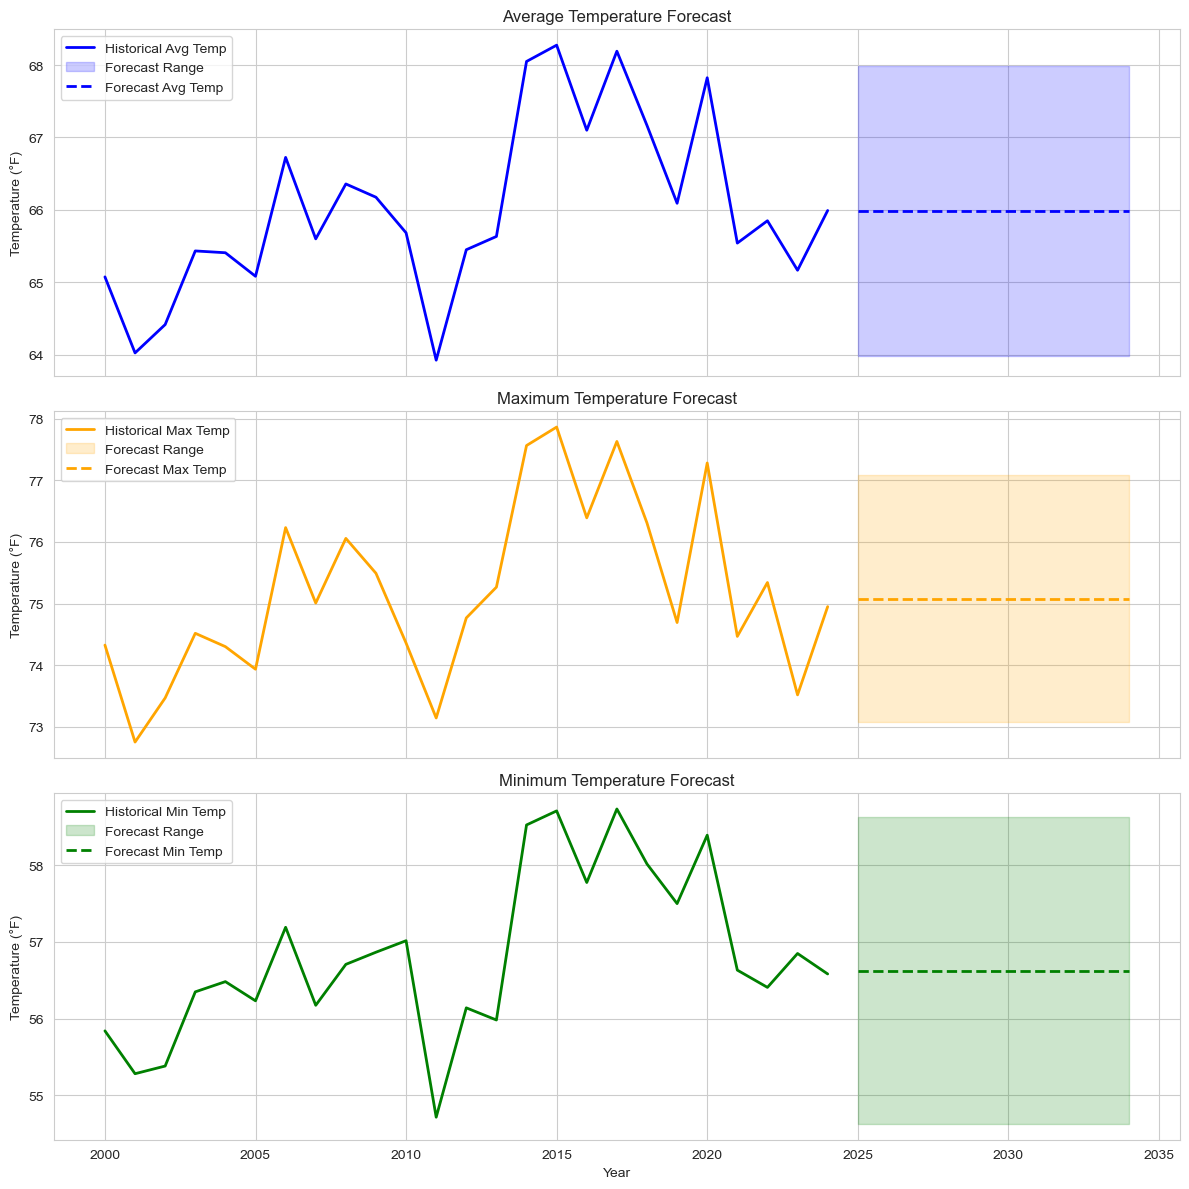

In [191]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare Data: Filter data from 2000 to 2024
climate_trend = df.groupby("YEAR").agg({"TAVG": "mean", "TMAX": "mean", "TMIN": "mean"}).reset_index()
climate_trend = climate_trend[(climate_trend["YEAR"] >= 2000) & (climate_trend["YEAR"] <= 2024)]

# Define Features (X) and Targets (y)
X = climate_trend["YEAR"].values.reshape(-1, 1)
y_avg = climate_trend["TAVG"]
y_max = climate_trend["TMAX"]
y_min = climate_trend["TMIN"]

# Split Data
X_train, X_test, y_train_avg, y_test_avg = train_test_split(X, y_avg, test_size=0.2, random_state=42)
_, _, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)
_, _, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)

# Train Random Forest Models
rf_avg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_avg.fit(X_train, y_train_avg)
rf_max = RandomForestRegressor(n_estimators=100, random_state=42)
rf_max.fit(X_train, y_train_max)
rf_min = RandomForestRegressor(n_estimators=100, random_state=42)
rf_min.fit(X_train, y_train_min)

# Forecast for the Next 10 Years
future_years = np.arange(2025, 2025 + 10).reshape(-1, 1)
forecast_avg = rf_avg.predict(future_years)
forecast_max = rf_max.predict(future_years)
forecast_min = rf_min.predict(future_years)

# Create Subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Average Temperature
ax[0].plot(climate_trend["YEAR"], y_avg, label="Historical Avg Temp", color="blue", linewidth=2)
ax[0].fill_between(future_years.flatten(), forecast_avg - 2, forecast_avg + 2, color="blue", alpha=0.2, label="Forecast Range")
ax[0].plot(future_years, forecast_avg, "--", color="blue", linewidth=2, label="Forecast Avg Temp")
ax[0].set_title("Average Temperature Forecast")
ax[0].set_ylabel("Temperature (°F)")
ax[0].legend()
ax[0].grid(True)

# Maximum Temperature
ax[1].plot(climate_trend["YEAR"], y_max, label="Historical Max Temp", color="orange", linewidth=2)
ax[1].fill_between(future_years.flatten(), forecast_max - 2, forecast_max + 2, color="orange", alpha=0.2, label="Forecast Range")
ax[1].plot(future_years, forecast_max, "--", color="orange", linewidth=2, label="Forecast Max Temp")
ax[1].set_title("Maximum Temperature Forecast")
ax[1].set_ylabel("Temperature (°F)")
ax[1].legend()
ax[1].grid(True)

# Minimum Temperature
ax[2].plot(climate_trend["YEAR"], y_min, label="Historical Min Temp", color="green", linewidth=2)
ax[2].fill_between(future_years.flatten(), forecast_min - 2, forecast_min + 2, color="green", alpha=0.2, label="Forecast Range")
ax[2].plot(future_years, forecast_min, "--", color="green", linewidth=2, label="Forecast Min Temp")
ax[2].set_title("Minimum Temperature Forecast")
ax[2].set_ylabel("Temperature (°F)")
ax[2].set_xlabel("Year")
ax[2].legend()
ax[2].grid(True)

# Adjust Layout
plt.tight_layout()
plt.show()
